<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/oneleague_w6_dass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bias, Variance, and Optimal Estimators

In [29]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
library(tidyverse)
library(caret)

In [31]:
#health insurance charges -- load data
health <- read_csv('health_insurance_charges.csv')
head(health)

New names:
• `` -> `...1`
Rows: 1207 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (5): ...1, age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,age,sex,bmi,children,smoker,region,charges
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,18,male,33.770,1,no,southeast,1725.552
2,28,NA,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
5,31,female,NA,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 112 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 112 rows containing missing values (`geom_point()`).”


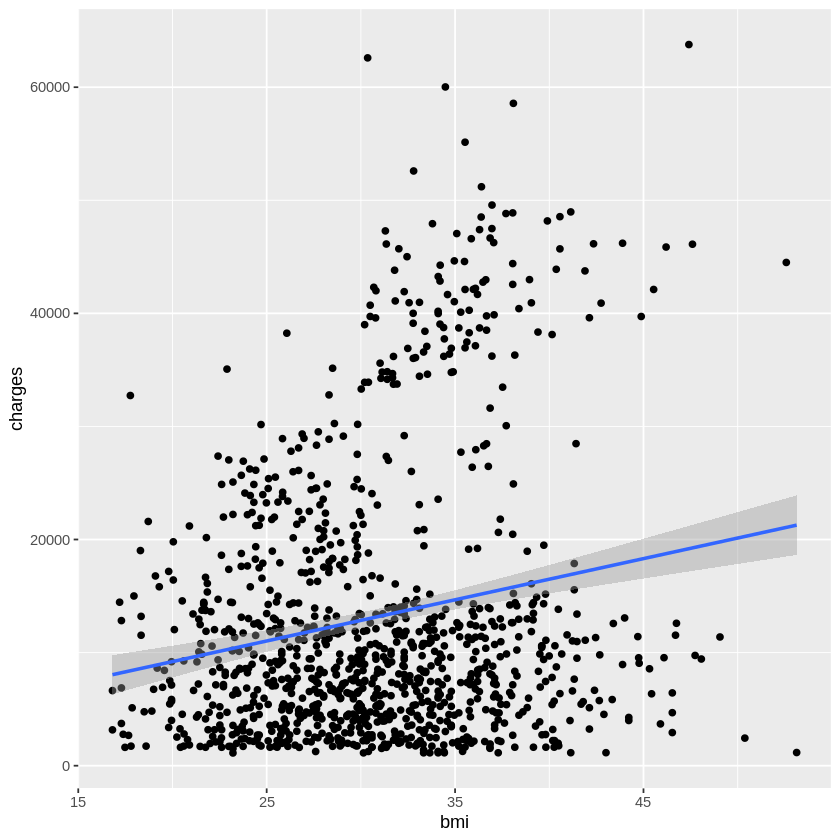

In [32]:
#simple model
ggplot(health, aes(x=bmi, y=charges)) +
  geom_point() +
  geom_smooth(method = 'lm')

In [33]:
#is it biased?
model1 <- lm(charges ~ bmi, data = health)
summary(model1)


Call:
lm(formula = charges ~ bmi, data = health)

Residuals:
   Min     1Q Median     3Q    Max 
-20109  -8045  -3737   4449  49613 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1923.36    1812.44   1.061    0.289    
bmi           364.18      57.81   6.300 4.31e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11780 on 1093 degrees of freedom
  (112 observations deleted due to missingness)
Multiple R-squared:  0.03504,	Adjusted R-squared:  0.03416 
F-statistic: 39.69 on 1 and 1093 DF,  p-value: 4.306e-10


In [34]:
new_data <- data.frame(bmi = c(33.77, 33))

In [35]:
preds <- predict(model1, new_data)

In [36]:
true <- c(1725.552, 4449.462)

In [37]:
mean((preds - true)^2)

[1] 123124224

In [38]:
health <- drop_na(health)

In [39]:
#quadratic terms
poly(health$bmi, 3)

1,2,3
0.0181105808,-0.025997317,-0.012226635
-0.0512925435,0.032768573,0.001482281
0.0160407181,-0.026955619,-0.009301287
-0.0197114562,-0.017205840,0.031080843
-0.0316288476,-0.002905760,0.030837033
-0.0292453694,-0.006207782,0.031777830
0.0560580640,0.021109297,-0.038806548
-0.0006436299,-0.028593809,0.013924473
-0.0441421086,0.018055689,0.017058683
0.0321291965,-0.015120012,-0.029824806


In [40]:
#next model
quad_model <- lm(charges ~ poly(bmi, 2), data=health)
summary(quad_model)


Call:
lm(formula = charges ~ poly(bmi, 2), data = health)

Residuals:
   Min     1Q Median     3Q    Max 
-18073  -8064  -3965   4746  45630 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    13127.4      454.6  28.876  < 2e-16 ***
poly(bmi, 2)1  57471.6    11828.9   4.859 1.47e-06 ***
poly(bmi, 2)2   1493.5    11828.9   0.126      0.9    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11830 on 674 degrees of freedom
Multiple R-squared:  0.03386,	Adjusted R-squared:  0.03099 
F-statistic: 11.81 on 2 and 674 DF,  p-value: 9.087e-06


In [41]:
#is it biased?
quad_preds <- predict(quad_model, data.frame(bmi = health$bmi))

In [42]:
quad_errors <- health$charges - quad_preds

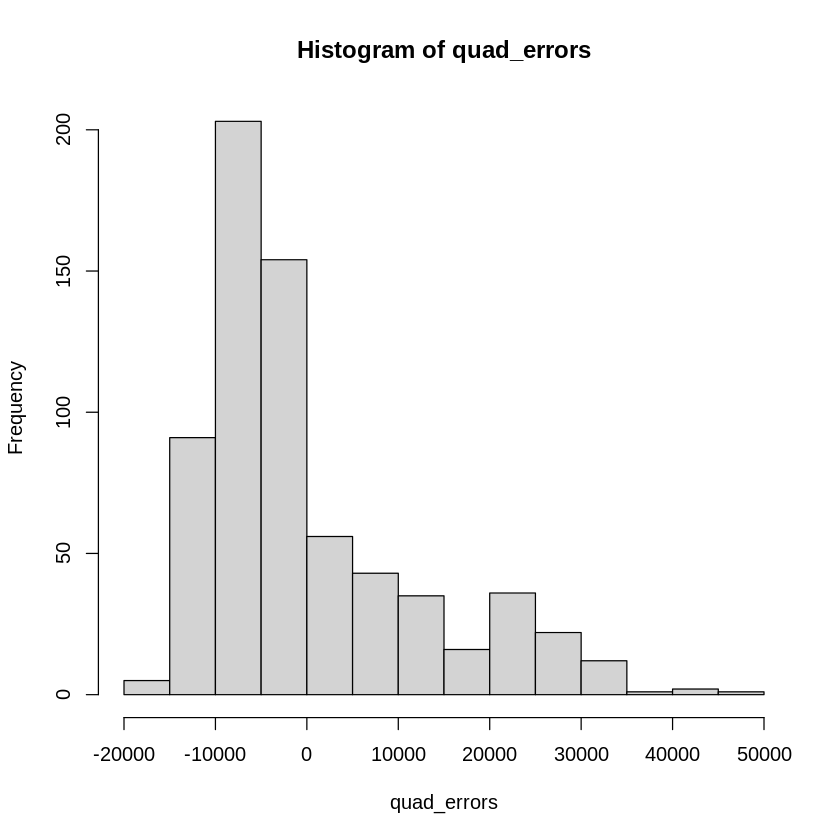

In [43]:
hist(quad_errors)

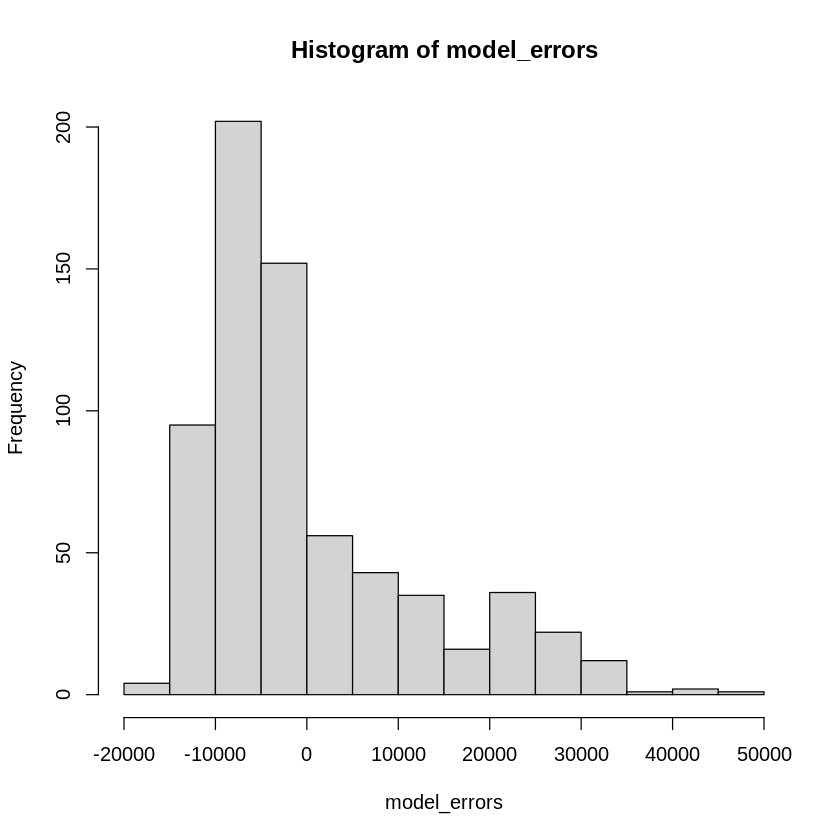

In [44]:
#what about variance?
model_preds <- predict(model1, data.frame(bmi = health$bmi))
model_errors <- health$charges - model_preds
hist(model_errors)

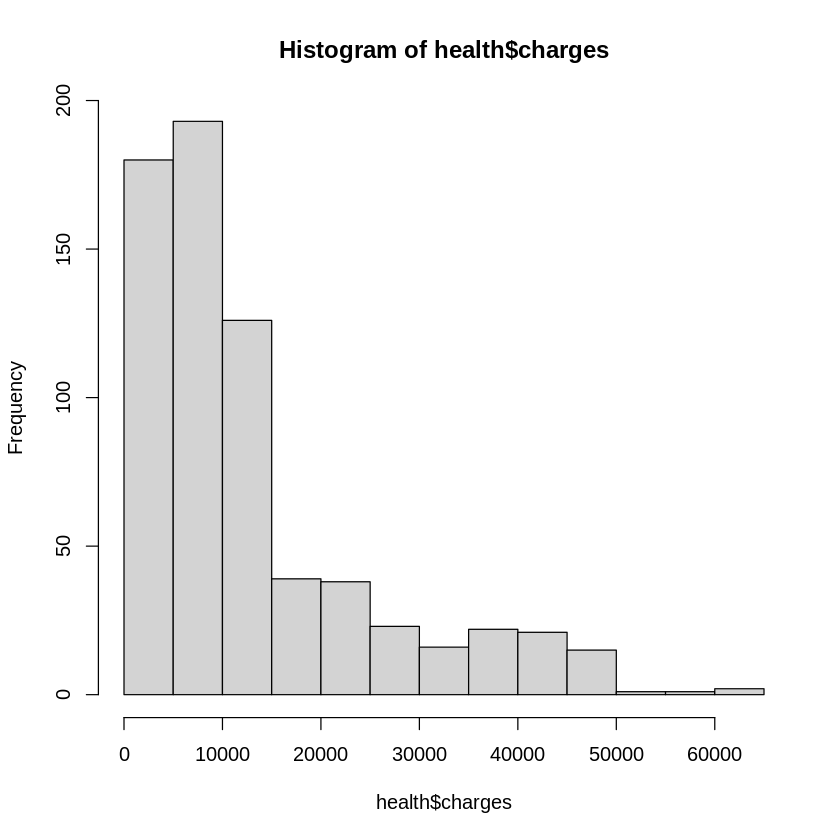

In [45]:
hist(health$charges)

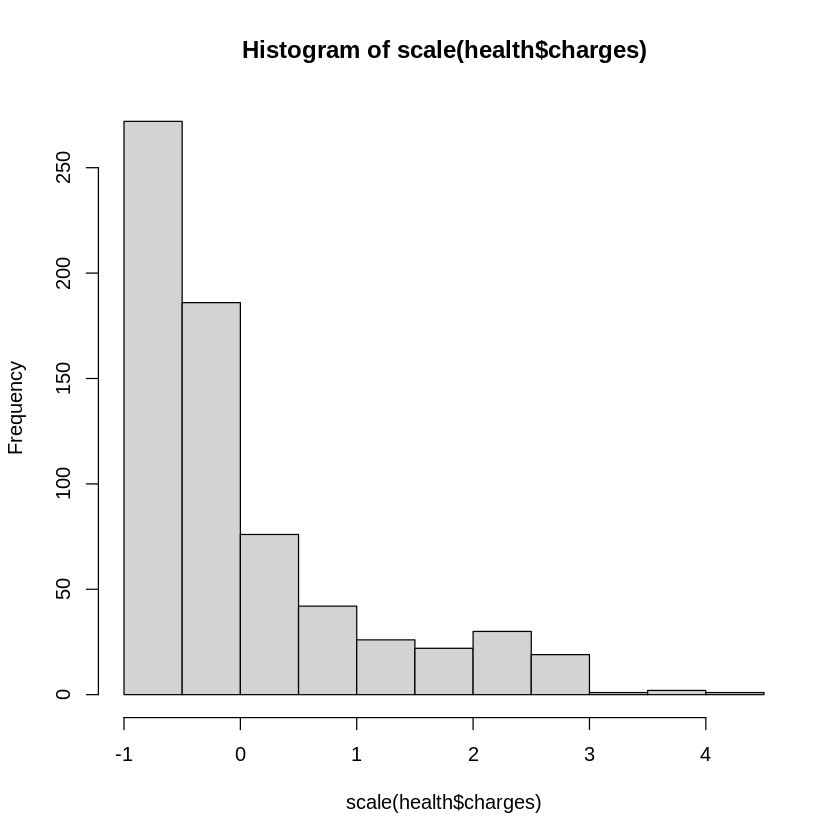

In [ ]:
hist(scale(health$charges))

In [46]:
log_model <- lm(log(charges) ~ bmi, data=health)
summary(log_model)


Call:
lm(formula = log(charges) ~ bmi, data = health)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22788 -0.61500  0.02136  0.65222  1.85656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.624181   0.179070   48.16   <2e-16 ***
bmi         0.015129   0.005688    2.66    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9068 on 675 degrees of freedom
Multiple R-squared:  0.01037,	Adjusted R-squared:  0.008908 
F-statistic: 7.076 on 1 and 675 DF,  p-value: 0.008


In [47]:
log_preds <- predict(log_model, data.frame(bmi = health$bmi))

In [48]:
log_errors <- log(health$charges) - log_preds

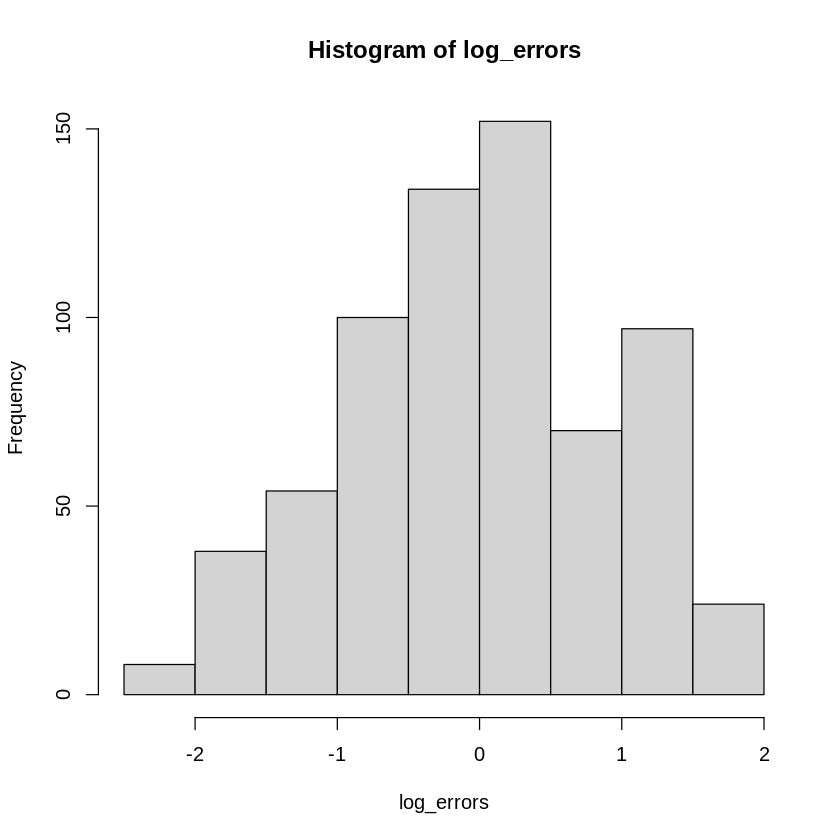

In [49]:
hist(log_errors)

In [55]:
log_quad <- lm(log(charges) ~ poly(bmi, 2, raw=TRUE), data = health)
summary(log_quad)


Call:
lm(formula = log(charges) ~ poly(bmi, 2, raw = TRUE), data = health)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.21268 -0.61478  0.01885  0.66699  1.85137 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8.4599018  0.6950685  12.171   <2e-16 ***
poly(bmi, 2, raw = TRUE)1  0.0259006  0.0444009   0.583    0.560    
poly(bmi, 2, raw = TRUE)2 -0.0001699  0.0006944  -0.245    0.807    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9074 on 674 degrees of freedom
Multiple R-squared:  0.01046,	Adjusted R-squared:  0.007525 
F-statistic: 3.563 on 2 and 674 DF,  p-value: 0.02889


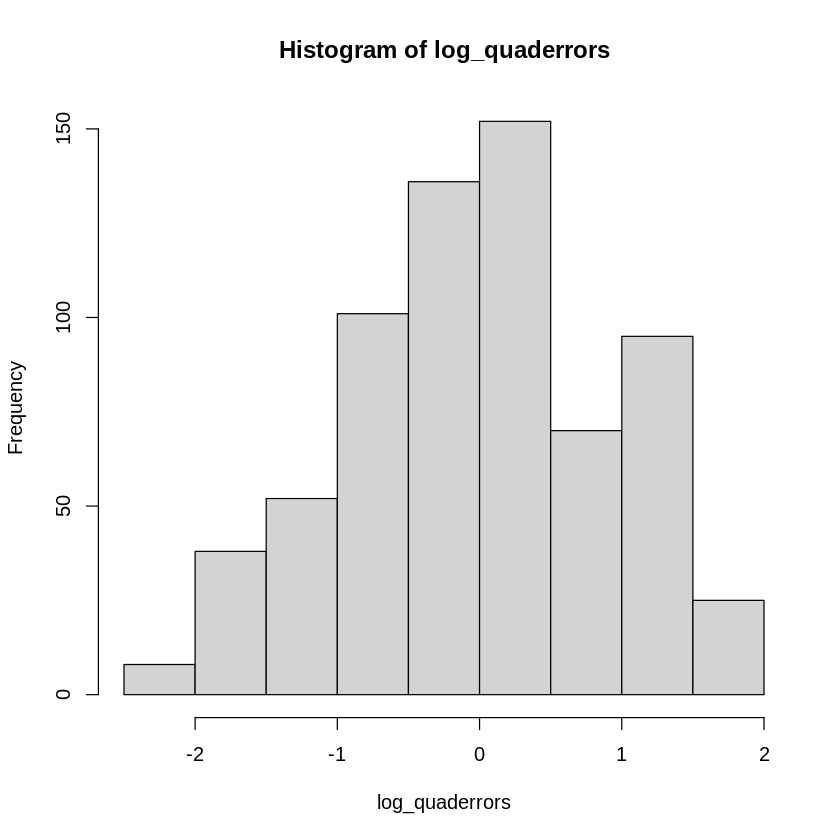

In [56]:
log_quadpreds <- predict(log_quad, data.frame(bmi = health$bmi))
log_quaderrors <- log(health$charges) - log_quadpreds
hist(log_quaderrors)

#### More Models

Build polynomial models of degree 1 - 9 on the data, computing the rmse of each model.

#### `caret`

In [59]:
train_idx <- createDataPartition(health$charges, p=0.8, list=FALSE)

In [60]:
train <- health[train_idx,]
test <- health[-train_idx,]

In [62]:
fitControl <- trainControl(method = "repeatedcv", number=5, repeats=5)

In [64]:
install.packages('elasticnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lars’




In [67]:
ridge_model <- train(charges ~ .,
      data = train,
      method = 'ridge',
      trControl = fitControl
      )

In [68]:
ridge_model

Ridge Regression 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 435, 436, 436, 434, 435, 436, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   MAE     
  0e+00   6185.593  0.7441875  4248.096
  1e-04   6185.590  0.7441877  4248.097
  1e-01   6184.809  0.7442143  4251.450

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 0.1.

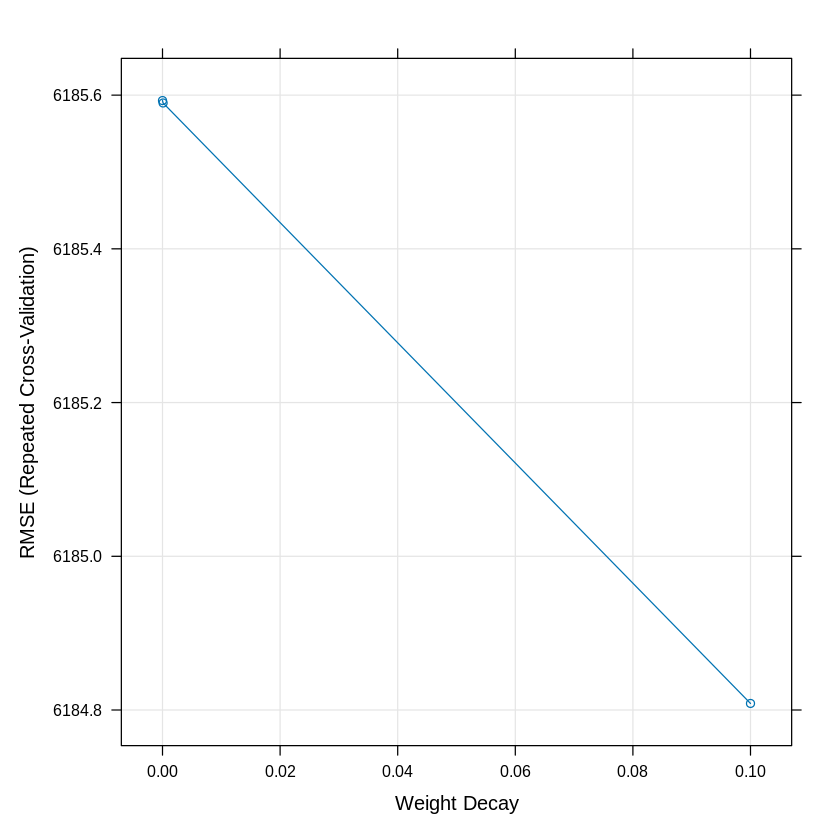

In [70]:
plot(ridge_model)

In [71]:
lasso_model <- train(charges ~ .,
      data = train,
      method = 'lasso',
      trControl = fitControl
      )
lasso_model

The lasso 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 436, 434, 436, 435, 435, 434, ... 
Resampling results across tuning parameters:

  fraction  RMSE       Rsquared   MAE     
  0.1       10871.801  0.6252022  8108.343
  0.5        7293.232  0.6980323  5379.523
  0.9        6219.791  0.7428202  4212.586

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was fraction = 0.9.

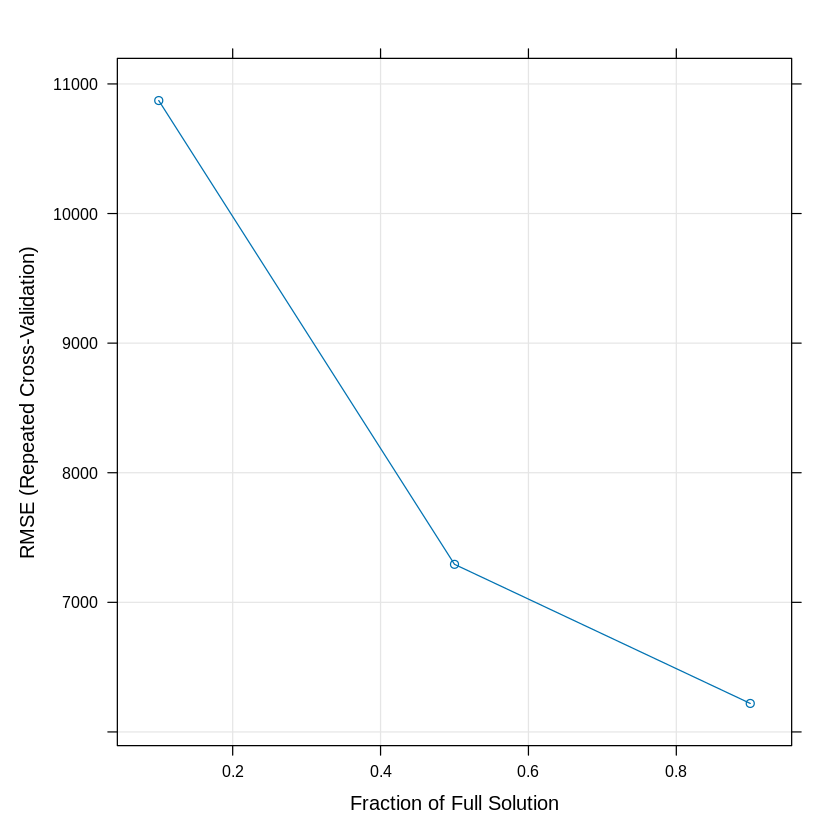

In [72]:
plot(lasso_model)

In [79]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [82]:
rpart_model <- train(charges ~ .,
      data = train,
      method = 'rpart',
      trControl = fitControl
      )
rpart_model

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 435, 436, 436, 435, 434, 434, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.07169001   5757.722  0.7718275  4021.612
  0.12392227   6922.374  0.6761206  5194.828
  0.62355634  10337.711  0.5642898  7723.508

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.07169001.

In [83]:
enet_model <- train(charges ~ .,
      data = train,
      method = 'enet',
      trControl = fitControl
      )
enet_model

Elasticnet 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 434, 435, 436, 435, 436, 433, ... 
Resampling results across tuning parameters:

  lambda  fraction  RMSE       Rsquared   MAE     
  0e+00   0.050     11512.457  0.6261147  8638.325
  0e+00   0.525      7151.234  0.7050235  5239.591
  0e+00   1.000      6225.724  0.7447581  4252.255
  1e-04   0.050     11512.465  0.6261147  8638.331
  1e-04   0.525      7151.266  0.7050224  5239.622
  1e-04   1.000      6225.721  0.7447584  4252.260
  1e-01   0.050     11518.145  0.6261147  8643.144
  1e-01   0.525      7174.904  0.7041698  5263.231
  1e-01   1.000      6224.905  0.7448060  4258.887

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were fraction = 1 and lambda = 0.1.

In [87]:
install.packages("lars")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [89]:
lars_model <- train(charges ~ .,
      data = train,
      method = 'lars',
      trControl = fitControl
      )
lars_model

Least Angle Regression 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 436, 435, 434, 435, 436, 436, ... 
Resampling results across tuning parameters:

  fraction  RMSE       Rsquared   MAE     
  0.050     11507.374  0.6230577  8640.167
  0.525      7167.244  0.7000427  5241.544
  1.000      6239.596  0.7388189  4275.091

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was fraction = 1.

In [90]:
lars2_model <- train(charges ~ .,
      data = train,
      method = 'lars2',
      trControl = fitControl
      )
lars2_model

Least Angle Regression 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 435, 436, 435, 435, 435, 436, ... 
Resampling results across tuning parameters:

  step  RMSE      Rsquared   MAE     
  2     8430.924  0.6234536  6406.243
  5     6243.452  0.7423543  4236.800
  9     6226.072  0.7415840  4249.608

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was step = 9.

In [91]:
install.packages("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [94]:
nn_model <- train(charges ~ .,
      data = train,
      method = 'neuralnet',
      trControl = fitControl
      )
nn_model

In [95]:
install.packages("pls")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [96]:
pca_model <- train(charges ~ .,
      data = train,
      method = 'pcr',
      trControl = fitControl
      )
pca_model

Principal Component Analysis 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 434, 435, 436, 436, 435, 435, ... 
Resampling results across tuning parameters:

  ncomp  RMSE      Rsquared     MAE     
  1      12202.21  0.005728478  9208.301
  2      11562.61  0.107564076  9028.797
  3      11428.61  0.127670227  9023.710

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was ncomp = 3.

In [97]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [101]:
rf_model <- train(charges ~ .,
      data = train,
      method = 'rf',
      trControl = fitControl
    )
rf_model

Random Forest 

544 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 434, 436, 435, 436, 435, 436, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     5841.021  0.8203304  4130.237
  5     4809.618  0.8440896  2818.483
  9     4869.254  0.8395274  2767.055

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 5.

#### Problem

Building an optimal regression model for health care costs.

- consider additional features
- compare different models using cross validation
